In [ ]:
####### SMV MODELS FOR HUMAN AND GPT CLASSIFICATION #######

[nltk_data] Downloading package stopwords to /Users/Fede/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


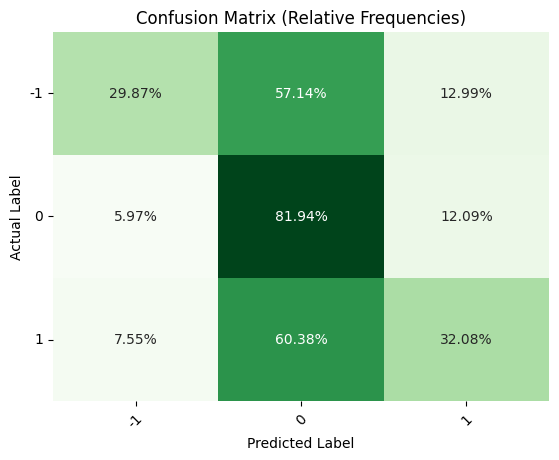

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')

# Load your training and test datasets
training_data = pd.read_excel("/Users/Fede/Desktop/Poster/Data/training_set.xlsx")
test_data = pd.read_excel("/Users/Fede/Desktop/Poster/Data/test_set.xlsx")

# Ensure labels are factors (categorical in Python)
training_data['label'] = training_data['Classification_personalism'].astype('category')
test_data['label'] = test_data['Classification_personalism'].astype('category')

# Function to clean tweets
def limpiar_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+|www\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'[%s]' % re.escape(string.punctuation), '', tweet)  # Remove punctuation
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove additional whitespaces
    return tweet

# Apply the cleaning function to the text
training_data['text'] = training_data['text'].apply(limpiar_tweet)
test_data['text'] = test_data['text'].apply(limpiar_tweet)

training_data = training_data[['text', 'label']]
test_data = test_data[['text', 'label']]

# Combine training and test data to ensure consistent DTM
combined_data = pd.concat([training_data, test_data])

# Custom transformer to apply in pipeline for preprocessing
class TextPreprocessor(TransformerMixin):
    def transform(self, X, **transform_params):
        return X.apply(lambda x: ' '.join([SnowballStemmer('spanish').stem(word) 
                                           for word in x.split() if word not in stopwords.words('spanish')]))
    
    def fit(self, X, y=None, **fit_params):
        return self

# Create the DTM
vectorizer = CountVectorizer()
pipeline = make_pipeline(TextPreprocessor(), vectorizer)

dtm_combined = pipeline.fit_transform(combined_data['text'])

# Split the combined DTM back into training and test DTMs
train_matrix = dtm_combined[:len(training_data), :]
test_matrix = dtm_combined[len(training_data):, :]

# Train the SVM model
model_svm = svm.SVC(kernel='linear', probability=True)
model_svm.fit(train_matrix, training_data['label'])

# Make predictions using the SVM model
predictions_svm = model_svm.predict(test_matrix)

# Compute the confusion matrix
cm = confusion_matrix(test_data['label'], predictions_svm, labels=training_data['label'].cat.categories)

# Convert confusion matrix to relative frequencies
cm_relative = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a plot for the confusion matrix with relative frequencies
sns.heatmap(cm_relative, annot=True, fmt=".2%", cmap="Greens", cbar=False, xticklabels=training_data['label'].cat.categories, yticklabels=training_data['label'].cat.categories)
plt.title("Confusion Matrix (Relative Frequencies)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("confusion_matrix_human.png", dpi=300, bbox_inches='tight')
plt.show()




In [33]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(test_data['label'], predictions_svm)

# Print the accuracy
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.7362


In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')

# Load your training and test datasets
training_data = pd.read_excel("/Users/Fede/Desktop/Poster/Data/training_set.xlsx")
test_data = pd.read_excel("/Users/Fede/Desktop/Poster/Data/test_set.xlsx")

# Ensure labels are factors (categorical in Python)
training_data['label'] = training_data['GPT_class_es'].astype('category')
test_data['label'] = test_data['GPT_class_es'].astype('category')

# Function to clean tweets
def limpiar_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+|www\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'[%s]' % re.escape(string.punctuation), '', tweet)  # Remove punctuation
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove additional whitespaces
    return tweet

# Apply the cleaning function to the text
training_data['text'] = training_data['text'].apply(limpiar_tweet)
test_data['text'] = test_data['text'].apply(limpiar_tweet)

training_data = training_data[['text', 'label']]
test_data = test_data[['text', 'label']]

# Combine training and test data to ensure consistent DTM
combined_data = pd.concat([training_data, test_data])

# Custom transformer to apply in pipeline for preprocessing
class TextPreprocessor(TransformerMixin):
    def transform(self, X, **transform_params):
        return X.apply(lambda x: ' '.join([SnowballStemmer('spanish').stem(word) 
                                           for word in x.split() if word not in stopwords.words('spanish')]))
    
    def fit(self, X, y=None, **fit_params):
        return self

# Create the DTM
vectorizer = CountVectorizer()
pipeline = make_pipeline(TextPreprocessor(), vectorizer)

dtm_combined = pipeline.fit_transform(combined_data['text'])

# Split the combined DTM back into training and test DTMs
train_matrix = dtm_combined[:len(training_data), :]
test_matrix = dtm_combined[len(training_data):, :]

# Train the SVM model
model_svm = svm.SVC(kernel='linear', probability=True)
model_svm.fit(train_matrix, training_data['label'])

# Make predictions using the SVM model
predictions_svm = model_svm.predict(test_matrix)

# Compute the confusion matrix
cm = confusion_matrix(test_data['label'], predictions_svm, labels=training_data['label'].cat.categories)

# Convert confusion matrix to relative frequencies
cm_relative = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


# Create a plot for the confusion matrix with relative frequencies
sns.heatmap(cm_relative, annot=True, fmt=".2%", cmap="Greens", cbar=False, xticklabels=training_data['label'].cat.categories, yticklabels=training_data['label'].cat.categories)
plt.title("Confusion Matrix (Relative Frequencies)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("confusion_matrix_gpt.png", dpi=300, bbox_inches='tight')
plt.show()





[nltk_data] Downloading package stopwords to /Users/Fede/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'builtin_function_or_method' object has no attribute 'cm'

In [30]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(test_data['label'], predictions_svm)

# Print the accuracy
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.6038
